Epoch: 0 Loss: 160.16854858398438
Epoch: 1000 Loss: 1.7848631143569946
Epoch: 2000 Loss: 2.1313436031341553
Epoch: 3000 Loss: 0.8581576347351074
Epoch: 4000 Loss: 0.8709861636161804
MSE: 84.16984558105469


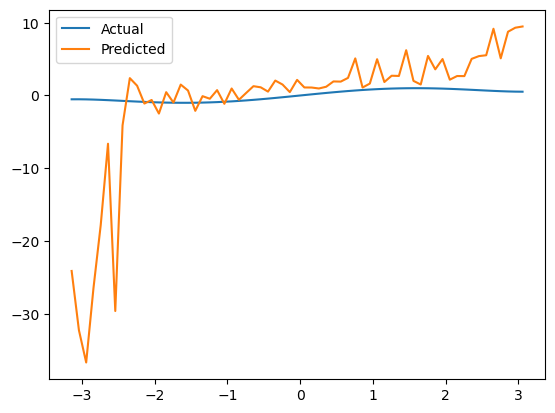

In [28]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import math

# Define the Taylor series of sin(x) up to the 5th order
def taylor_sin(x):
    return x - (x ** 3)/math.factorial(3) + (x ** 5)/math.factorial(5)

# Generate training data
x_train = np.arange(-2*math.pi, 2*math.pi, 0.1)
y_train = taylor_sin(x_train)

# Define the transformer model architecture
class TransformerModel(nn.Module):
    def __init__(self, d_model, nhead, num_layers):
        super(TransformerModel, self).__init__()
        self.pos_encoder = nn.Linear(1, d_model)
        encoder_layers = nn.TransformerEncoderLayer(d_model, nhead)
        self.transformer_encoder = nn.TransformerEncoder(encoder_layers, num_layers)
        self.decoder = nn.Linear(d_model, 1)
        
    def forward(self, src):
        src = self.pos_encoder(src)
        output = self.transformer_encoder(src)
        output = self.decoder(output)
        return output

# Instantiate the transformer model
model = TransformerModel(d_model=128, nhead=4, num_layers=4)

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters())

# Train the model
for epoch in range(5000):
    optimizer.zero_grad()
    x_batch = torch.tensor(x_train).unsqueeze(1)
    y_batch = torch.tensor(y_train).unsqueeze(1)
    y_pred = model(x_batch.float())
    loss = criterion(y_pred, y_batch.float())
    loss.backward()
    optimizer.step()
    if epoch % 1000 == 0:
        print('Epoch:', epoch, 'Loss:', loss.item())

# Evaluate the model on new data
x_test = np.arange(-math.pi, math.pi, 0.1)
y_test = taylor_sin(x_test)
x_test = torch.tensor(x_test).unsqueeze(1)
y_test = torch.tensor(y_test).unsqueeze(1)
y_pred = model(x_test.float())
mse = criterion(y_pred, y_test.float())
print('MSE:', mse.item())

# Convert the results to numpy arrays for plotting
x_test = x_test.detach().numpy()
y_test = y_test.detach().numpy()
y_pred = y_pred.detach().numpy()

# Plot the results
import matplotlib.pyplot as plt
plt.plot(x_test.squeeze(), y_test.squeeze(), label='Actual')
plt.plot(x_test.squeeze(), y_pred.squeeze(), label='Predicted')
plt.legend()
plt.show()
